In [318]:
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut , GeocoderUnavailable , GeocoderInsufficientPrivileges
from sklearn.linear_model import LinearRegression
import time
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm




In [319]:
df = pd.read_csv('Initial_Breakdown_Plan.xlsx - Dataset.csv')

In [320]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\Boomw\AppData\Local\Temp\ipykernel_23820\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [321]:
def get_coordinates(cities, country="UK"):
    geolocator = Nominatim(user_agent="geoapiExercises" , timeout=10)
    coordinates = {}

    for city in cities:
        city_query = f"{city}, {country}"
        try:
            location = geolocator.geocode(city_query)
            if location:
                coordinates[city] = (location.latitude, location.longitude)
            else:
                print(f"Could not get the location for {city}")
        except (GeocoderTimedOut, GeocoderInsufficientPrivileges) as e:
            print(f"Error: {e} for {city}")

    return coordinates



In [322]:
def choose_color(city):
    if city == 'London':
        return 'red'
    elif city == 'Belfast' or city == 'Birmingham':
        return 'orange'
    else:
        return 'green'


C:\Users\Boomw\AppData\Local\Temp\ipykernel_23820\217254784.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


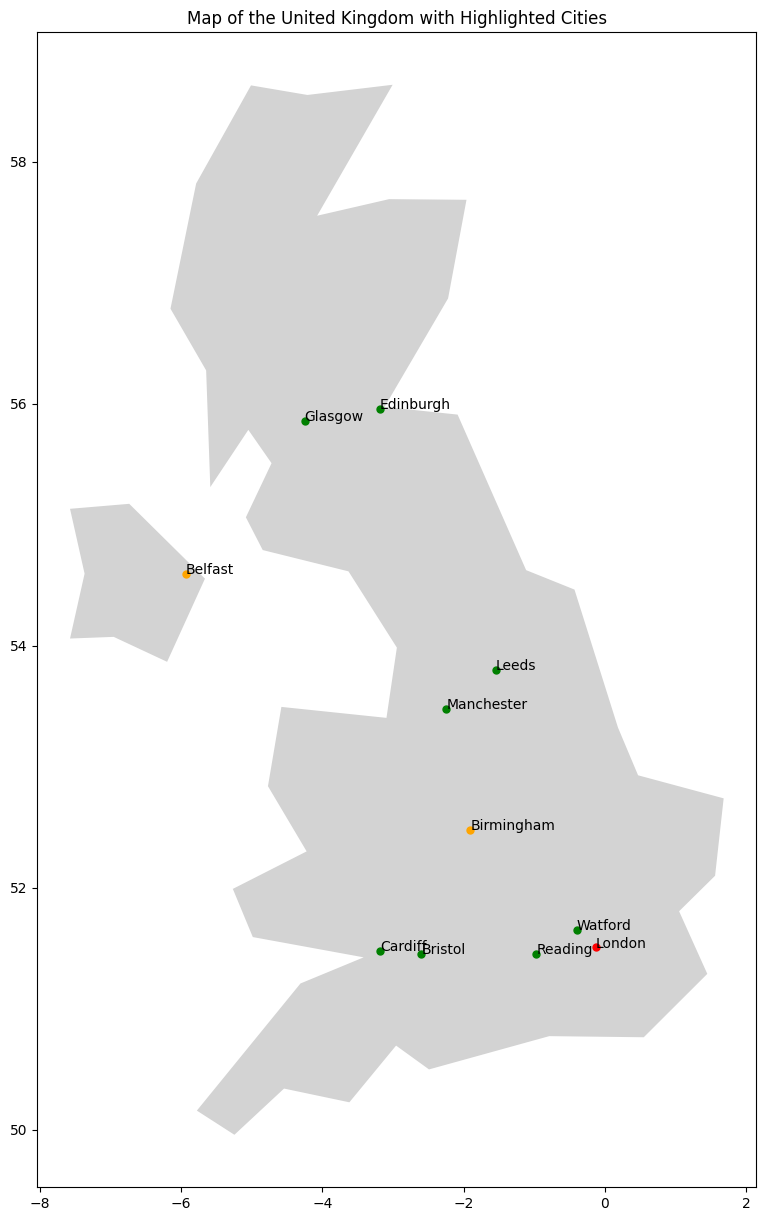

In [323]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the built-in Natural Earth dataset from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to only include the United Kingdom
uk = world[world['name'] == 'United Kingdom']

# Define the cities and their coordinates
cities = {'London': (51.5074456, -0.1277653),
 'Belfast': (54.596391, -5.9301829),
 'Reading': (51.4564242, -0.9700664),
 'Birmingham': (52.4796992, -1.9026911),
 'Leeds': (53.7974185, -1.5437941),
 'Bristol': (51.4538022, -2.5972985),
 'Manchester': (53.4794892, -2.2451148),
 'Watford': (51.6553875, -0.3957425),
 'Edinburgh': (55.9533456, -3.1883749),
 'Glasgow': (55.861155, -4.2501687),
 'Cardiff': (51.4816546, -3.1791934)}

# Create a figure with a specified size
fig, ax = plt.subplots(figsize=(10, 15))  # You can adjust the size as you like

# Plot the map of the United Kingdom
uk.plot(ax=ax, color='lightgray')

# Plot each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', color=choose_color(city), markersize=5)
    ax.text(lon, lat, city, fontsize=10)

plt.title('Map of the United Kingdom with Highlighted Cities')
plt.show()


In [324]:
# Getting the amount of items purchased in each area
london = df[df['Location'] == 'London']
belfast = df[df['Location'] == 'Belfast']
reading = df[df['Location'] == 'Reading']
birmingham = df[df['Location'] == 'Birmingham']
leeds = df[df['Location'] == 'Leeds']
bristol = df[df['Location'] == 'Bristol']
manchester = df[df['Location'] == 'Manchester']
watford = df[df['Location'] == 'Watford']
edinburgh = df[df['Location'] == 'Edinburgh']
glasgow  = df[df['Location'] == 'Glasgow']
cardiff  = df[df['Location'] == 'Cardiff']

In [325]:
len_of_city_array = [len(london) , len(belfast) , len(reading),
                         len(birmingham) , len(leeds) , len(bristol),
                         len(manchester) , len(watford) , len(edinburgh),
                         len(glasgow) , len(cardiff)]

cities = ['London', 'Belfast' , 'Reading' , 'Birmingham' , 'Leeds' , 'Bristol' , 'Manchester' , 'Watford' , 'Edinburgh' , 'Glasgow' , 'Cardiff']

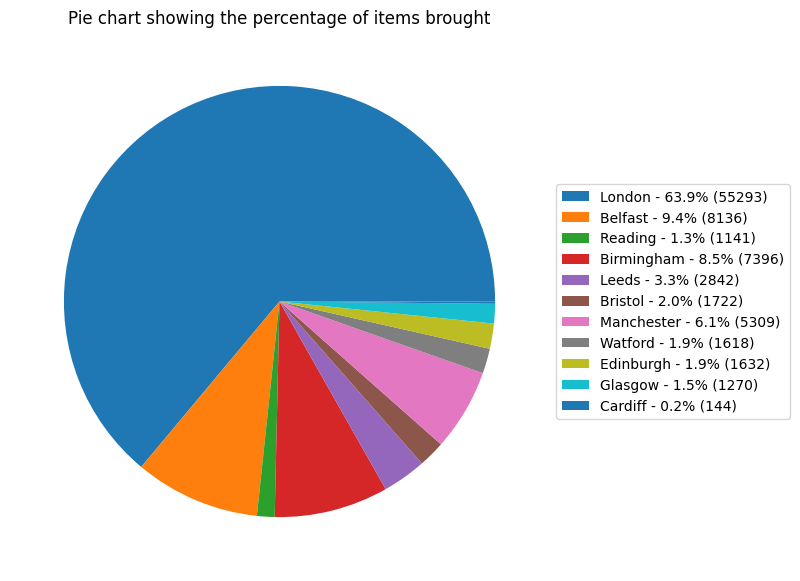

In [326]:

# Calculate the percentage for each city
percentages = [100. * amount / sum(len_of_city_array) for amount in len_of_city_array]

# Creating the pie chart without displaying percentages on the chart itself
plt.figure(figsize=(14, 7))
wedges, texts = plt.pie(len_of_city_array)

# Create custom labels for the legend, combining city names with their respective percentages and values
legend_labels = [f'{city} - {percentage:.1f}% ({value})' for city, percentage, value in zip(cities, percentages, len_of_city_array)]

# Adding the legend with custom labels
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie chart showing the percentage of items brought')
plt.show()


In [327]:
london_avg_money_spent = np.mean(london['Cost'])
belfast_avg_money_spent = np.mean(belfast['Cost'])
reading_avg_money_spent = np.mean(reading['Cost'])
birmingham_avg_money_spent = np.mean(birmingham['Cost'])
leeds_avg_money_spent = np.mean(leeds['Cost'])
bristol_avg_money_spent = np.mean(bristol['Cost'])
manchester_avg_money_spent = np.mean(manchester['Cost'])
watford_avg_money_spent = np.mean(watford['Cost'])
edinburgh_avg_money_spent = np.mean(edinburgh['Cost'])
glasgow_avg_money_spent = np.mean(glasgow['Cost'])
cardiff_avg_money_spent = np.mean(cardiff['Cost'])


In [328]:
london_Item_Desc = london['Item Desc']
belfast_Item_Desc = belfast['Item Desc']
reading_Item_Desc = reading['Item Desc']
birmingham_Item_Desc = birmingham['Item Desc']
leeds_Item_Desc = leeds['Item Desc']
bristol_Item_Desc = bristol['Item Desc']
manchester_Item_Desc = manchester['Item Desc']
watford_Item_Desc = watford['Item Desc']
edinburgh_Item_Desc = edinburgh['Item Desc']
glasgow_Item_Desc = glasgow ['Item Desc']
cardiff_Item_Desc = cardiff ['Item Desc']

In [329]:
london_Cost_Center = london['Cost Center Level 5']
belfast_Cost_Center = belfast['Cost Center Level 5']
reading_Cost_Center = reading['Cost Center Level 5']
birmingham_Cost_Center = birmingham['Cost Center Level 5']
leeds_Cost_Center = leeds['Cost Center Level 5']
bristol_Cost_Center = bristol['Cost Center Level 5']
manchester_Cost_Center = manchester['Cost Center Level 5']
watford_Cost_Center = watford['Cost Center Level 5']
edinburgh_Cost_Center = edinburgh['Cost Center Level 5']
glasgow_Cost_Center = glasgow['Cost Center Level 5']  
cardiff_Cost_Center = cardiff['Cost Center Level 5']   


In [330]:
Item_Desc_array = [london_Item_Desc,
belfast_Item_Desc,
reading_Item_Desc,
birmingham_Item_Desc,
leeds_Item_Desc,
bristol_Item_Desc,
manchester_Item_Desc,
watford_Item_Desc,
edinburgh_Item_Desc,
glasgow_Item_Desc,
cardiff_Item_Desc]

In [331]:
cost_center_array = [len(london_Cost_Center),
belfast_Cost_Center,
reading_Cost_Center,
birmingham_Cost_Center,
leeds_Cost_Center,
bristol_Cost_Center,
manchester_Cost_Center,
watford_Cost_Center,
edinburgh_Cost_Center,
glasgow_Cost_Center, 
cardiff_Cost_Center]

In [332]:
avg_money_spent_array = [london_avg_money_spent , belfast_avg_money_spent , reading_avg_money_spent , birmingham_avg_money_spent,
                         leeds_avg_money_spent , bristol_avg_money_spent , manchester_avg_money_spent , watford_avg_money_spent,
                        edinburgh_avg_money_spent , glasgow_avg_money_spent , cardiff_avg_money_spent]

<BarContainer object of 11 artists>

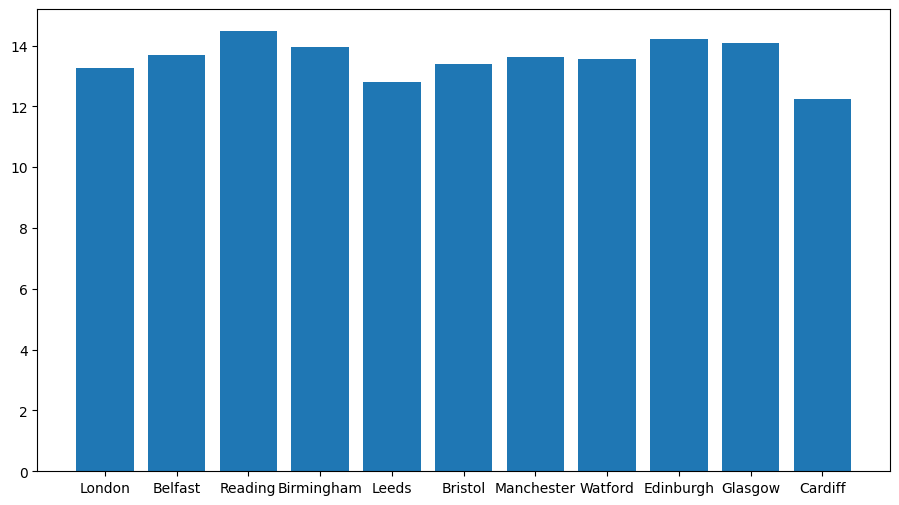

In [333]:
plt.figure(figsize=(11, 6))
plt.bar(cities , avg_money_spent_array)

In [334]:
df_machine = df['Machine']
unique_machine = df_machine.unique()

In [335]:
# Arrays to hold the separated values
london_belfast_city = [place for place in unique_machine if place.startswith("London") or place.startswith("Belfast")]
other_city = [place for place in unique_machine if not (place.startswith("London") or place.startswith("Belfast"))]


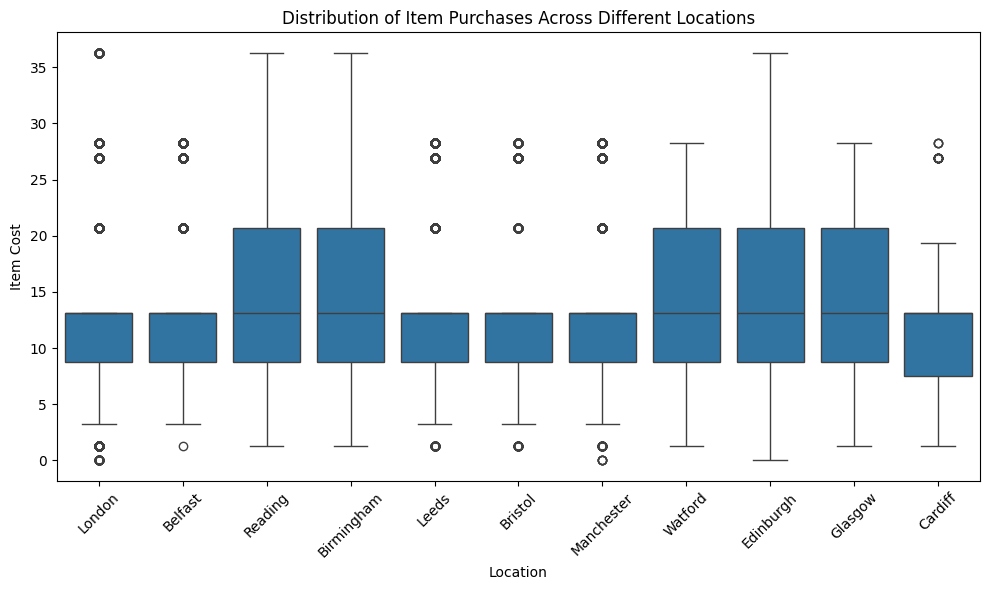

In [336]:
#This needs to be changed to a normal distribution graph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# df should have columns: 'Location' and 'Cost' or any other column representing the quantity of items bought

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [337]:
np.average(london['Cost'])

13.263668457128391

Doing the sairma model

In [338]:
import pandas as pd

def items_per_week(df):
    # Convert 'Date' to datetime if it's not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Convert the dates to weekly periods
    df['Week_Period'] = df['Date'].dt.to_period('W')

    # Now you can group by 'Week_Period'
    weekly_groups = df.groupby('Week_Period')

    # Perform some operations within each group, for example, counting the rows per week
    weekly_counts = weekly_groups.size().reset_index(name='Counts')

    # Convert the 'Week_Period' to the start date of each week
    weekly_counts['Week_Start_Date'] = weekly_counts['Week_Period'].dt.start_time

    # If you want 'Week_Start_Date' to be the first column
    weekly_counts = weekly_counts[['Week_Start_Date', 'Counts']]

    return weekly_counts


In [339]:
items_per_week = items_per_week(df)
items_per_week = items_per_week.drop(items_per_week.index[0])


In [340]:
type(items_per_week['Week_Start_Date'].iloc[0])


pandas._libs.tslibs.timestamps.Timestamp

In [341]:
def get_fuller(location):
    adf_result = adfuller(location.groupby('Day').size())

    print('ADF Statistic: %f' % adf_result[0])
    print('p-value: %f' % adf_result[1])
    print('Critical Values:')
    for key, value in adf_result[4].items():
        print('\t%s: %.3f' % (key, value))


In [342]:
def draw_time_graph(df):
    
    # Now plot the 'items_brought' Series
    plt.figure(figsize=(10, 5))  # Set the figure size (optional)
    plt.plot(df['Week_Start_Date'] , df['Counts'])  # Plot the data
    
    # Customizing the plot
    plt.title('Time Series')
    plt.xlabel('Date')
    plt.ylabel('Items Purchased')
    plt.legend()

    # Rotate date labels for better readability (optional)
    plt.xticks(rotation=45)
    
    # Set the y-axis to start from the minimum value of 'Items Purchased' or any other desired value


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


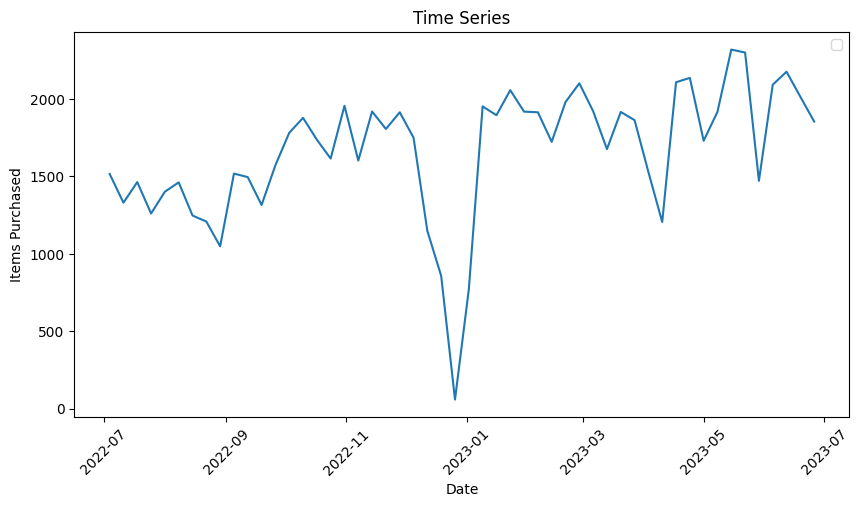

In [343]:
draw_time_graph(items_per_week)

In [344]:
def adfuller_test(items_purchased):
    result=adfuller(items_purchased)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [345]:
adfuller_test(items_per_week['Counts'])

ADF Test Statistic : -3.3677788609695374
p-value : 0.012107573899842575
#Lags Used : 0
Number of Observations Used : 51
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [346]:
def plot_acf_pacf(seasonal_difference , no_of_na):
    fig = plt.figure(figsize=(12,8))

    nlags = min(40, len(seasonal_difference.iloc[(no_of_na+1):]) // 2 - 1)

    # Assuming 'df' is your DataFrame and 'Seasonal First Difference' is a column in your DataFrame
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax1)

    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(seasonal_difference.iloc[(no_of_na+1):], lags=nlags, ax=ax2)

    plt.show()


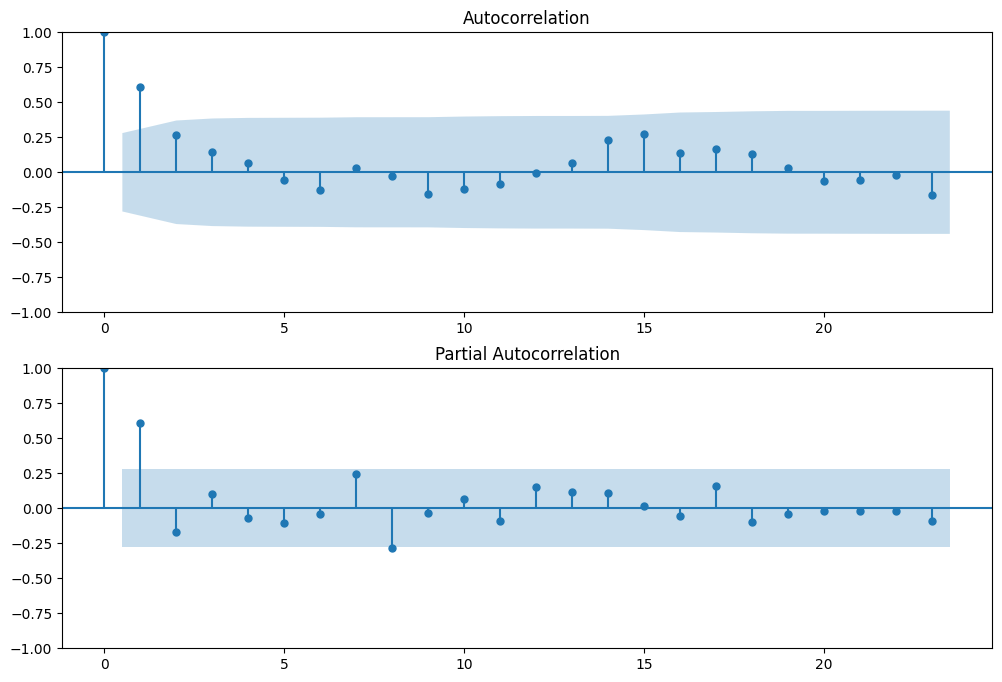

In [347]:
plot_acf_pacf(items_per_week['Counts'] , 2)

In [348]:
indices_to_exclude = [24, 25, 26, 27]
filtered_item = items_per_week.drop(indices_to_exclude)

In [349]:
filtered_items = filtered_item['Counts']
filtered_items_week = filtered_item['Week_Start_Date']

In [350]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(filtered_items
                          ,trace = True , suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=647.771, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=669.410, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=666.501, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=652.649, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=667.440, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=651.204, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=642.287, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=646.382, Time=0.11 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=638.794, Time=0.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=647.134, Time=0.17 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=640.630, Time=0.30 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=640.557, Time=0.31 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=641.021, Time=0.34 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=646.869, 

In [351]:
import statsmodels.api as sm

p = 4
d = 1  # For ARMA, d (differencing order) should be 0
q = 2

# Fit an ARMA model
model = sm.tsa.arima.ARIMA(filtered_items, order=(p, d, q),
                           enforce_stationarity=False, enforce_invertibility=False)

results = model.fit()

# You can now print out the summary of the model
print(results.summary())

# To make future predictions:
n_periods = 2  # For example, predict for 2 periods ahead
forecast = results.get_forecast(steps=n_periods)
forecast_df = forecast.conf_int()
forecast_df['forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

print(forecast_df)


                               SARIMAX Results                                
Dep. Variable:                 Counts   No. Observations:                   48
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -286.405
Date:                Wed, 01 May 2024   AIC                            586.811
Time:                        13:09:43   BIC                            599.139
Sample:                             0   HQIC                           591.357
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5351      0.248     -6.178      0.000      -2.022      -1.048
ar.L2         -1.7622      0.306     -5.756      0.000      -2.362      -1.162
ar.L3         -1.2742      0.304     -4.191      0.0

c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Boomw\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



    lower Counts  upper Counts     forecast
48   1893.784767   2616.843196  2255.313982
49   1831.489640   2635.828549  2233.659095


c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [352]:
model_fit = model.fit()

# Correct the last known date by removing extra characters and convert to datetime
last_known_date = '2023-06-26'  # Removed the tab character
last_known_date = pd.to_datetime(last_known_date)

# Calculate the start date for the forecast as the next Monday after last_known_date
start_date = last_known_date + pd.DateOffset(days=(7 - last_known_date.weekday()))

# Now we create the date range for the forecast
forecast_date_range = pd.date_range(start=start_date, periods=8, freq='W-MON')

# Out-of-sample forecasts
forecast = model_fit.get_forecast(steps=8)  # Replace 10 with the number of future periods to forecast
forecast_conf_int = forecast.conf_int()
forecast_conf_int.index = forecast_date_range
forecast_predicted_mean = forecast.predicted_mean
forecast_predicted_mean.index = forecast_date_range

c:\Users\Boomw\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Boomw\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [353]:
LQ_item_o= np.percentile(items_per_week['Counts'], 25)  # 25th percentile, also known as the lower quartile
median_item_o = np.percentile(items_per_week['Counts'], 50)  # 50th percentile, also known as the median
UQ_item_o = np.percentile(items_per_week['Counts'], 75)  # 75th percentile, also known as the upper quartile
LQ_item_p= np.percentile(forecast_predicted_mean, 25)  # 25th percentile, also known as the lower quartile
median_item_p = np.percentile(forecast_predicted_mean, 50)  # 50th percentile, also known as the median
UQ_item_p = np.percentile(forecast_predicted_mean, 75)  # 75th percentile, also known as the upper quartile



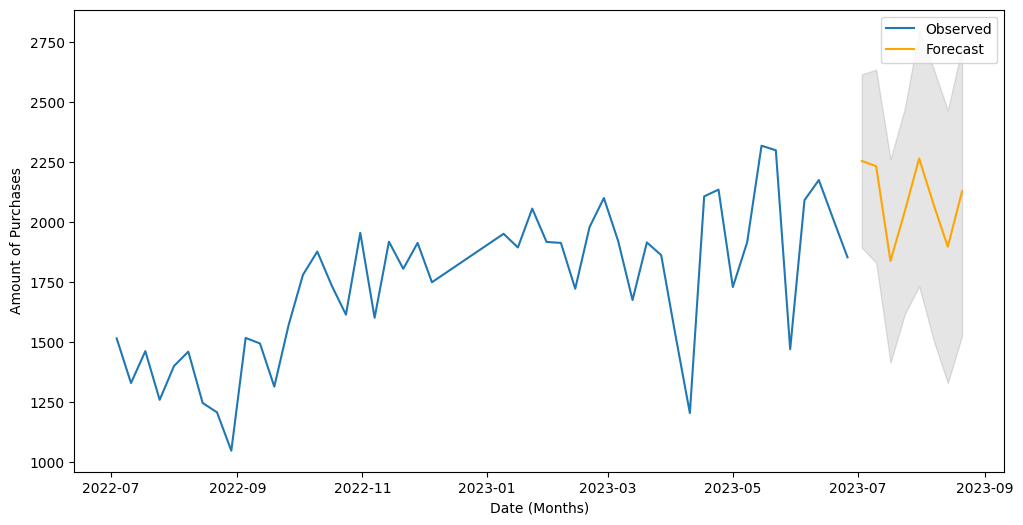

In [354]:
# Plotting the observed and forecasted values
plt.figure(figsize=(12, 6))

# Plot the observed values
plt.plot(filtered_items_week, filtered_items, label='Observed')

# Plot the forecasted values
plt.plot(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

plt.ylabel('Amount of Purchases')
plt.xlabel('Date (Months)')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

#plt.axhline(median_item_o, color='orange', linestyle='-.', label='Predicted median')

#plt.axhline(median_item_p, color='blue', linestyle='--', label='original median')

plt.legend()
plt.show()

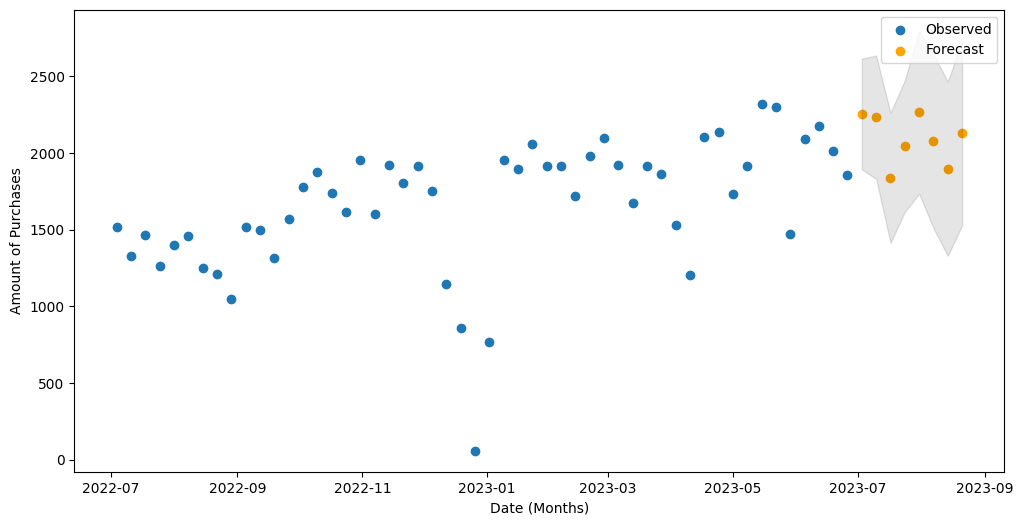

In [355]:
# Plotting the observed and forecasted values
plt.figure(figsize=(12, 6))

# Plot the observed values
plt.scatter(items_per_week['Week_Start_Date'], items_per_week['Counts'], label='Observed')

# Plot the forecasted values
plt.scatter(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

plt.ylabel('Amount of Purchases')
plt.xlabel('Date (Months)')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

#plt.axhline(median_item_o, color='orange', linestyle='-.', label='Predicted median')

#plt.axhline(median_item_p, color='blue', linestyle='--', label='original median')

plt.legend()
plt.show()

In [356]:
forecast_predicted_mean

2023-07-03    2255.313982
2023-07-10    2233.659095
2023-07-17    1838.466685
2023-07-24    2045.870837
2023-07-31    2265.971819
2023-08-07    2076.191955
2023-08-14    1898.069449
2023-08-21    2129.584036
Freq: W-MON, Name: predicted_mean, dtype: float64

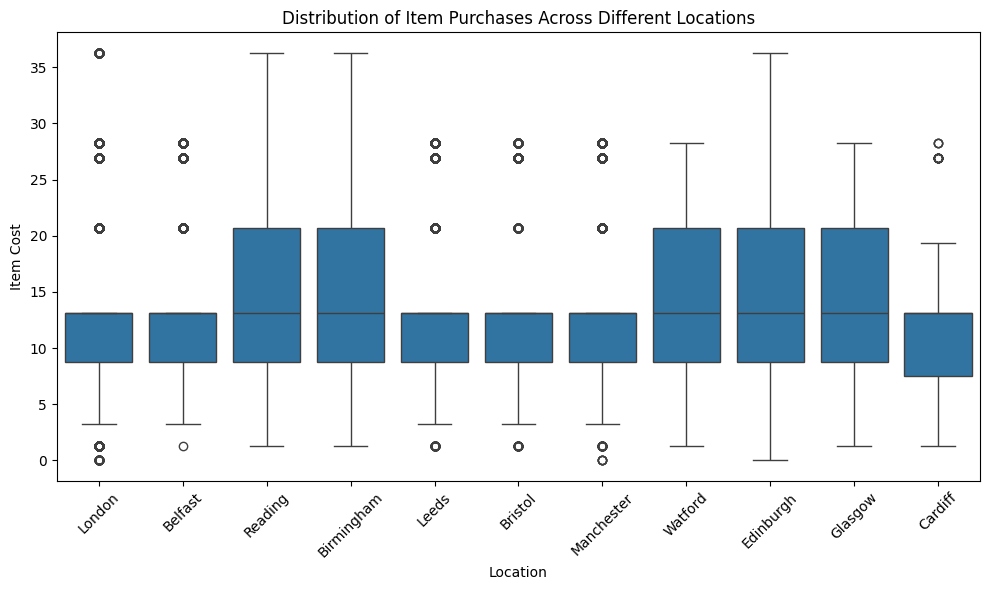

In [357]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Location', y='Cost')
plt.xlabel('Location')
plt.ylabel('Item Cost')
plt.title('Distribution of Item Purchases Across Different Locations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

Text(0.5, 1.0, 'Predicted amount of items to be purchased per month (07/23 - 09/23)')

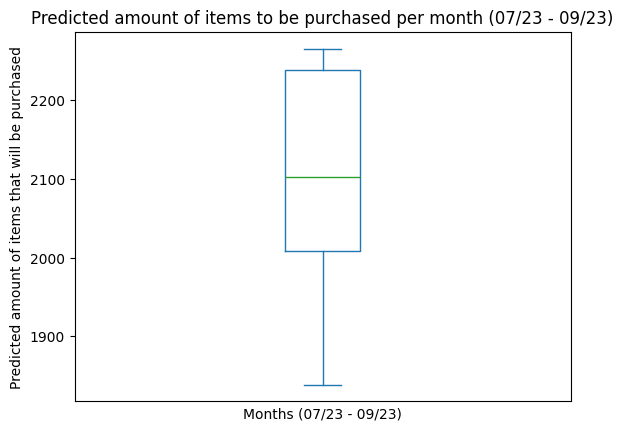

In [358]:
forecast_predicted_mean.plot.box()
plt.ylabel('Predicted amount of items that will be purchased')
plt.xticks([])
plt.xlabel('Months (07/23 - 09/23)')
plt.title('Predicted amount of items to be purchased per month (07/23 - 09/23)')


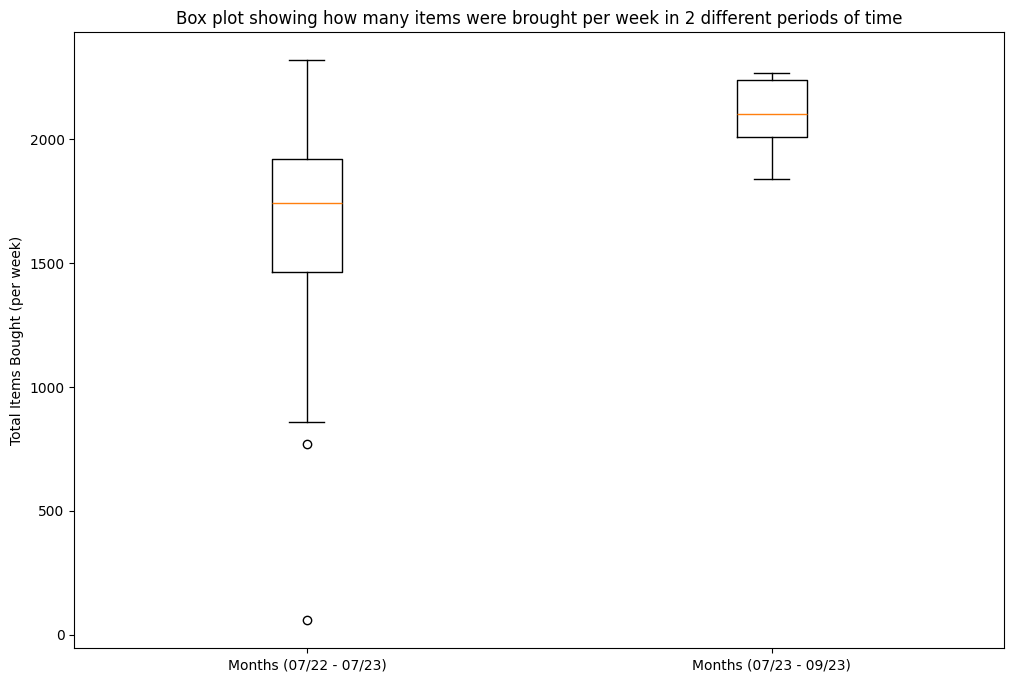

In [369]:

data_to_plot = [items_per_week['Counts']  , forecast_predicted_mean]
plt.figure(figsize=(12, 8))  # Set the figure size as per your preference
plt.boxplot(data_to_plot)
plt.title('Box plot showing how many items were brought per week in 2 different periods of time')
plt.xticks([1, 2], ['Months (07/22 - 07/23)', 'Months (07/23 - 09/23)'])  # Set custom x-tick labels
plt.ylabel('Total Items Bought (per week)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'forecast_predicted_mean' and 'items_per_week' are defined DataFrames with your data

# Concatenate the data for boxplot comparison, with labels for identification
data_to_plot = pd.concat([items_per_week['Counts'].rename('Purchased (07/22 - 07/23)'),
                          combined_series.rename('Predicted (07/22 - 09/23)')], axis=1)

# Create a plot
plt.figure(figsize=(8, 6))  # Set figure size
ax = data_to_plot.boxplot()
ax.set_ylabel('Amount of items')
ax.set_title('Purchases ')
plt.xticks([1, 2], ['Data obtained for (07/22 - 07/23)', 'Data predicted from (07/22 - 09/23)'])  # Set custom x-ticks labels


# Disable grid lines
#ax.grid(False)

# Show the plot
plt.show()


NameError: name 'combined_series' is not defined

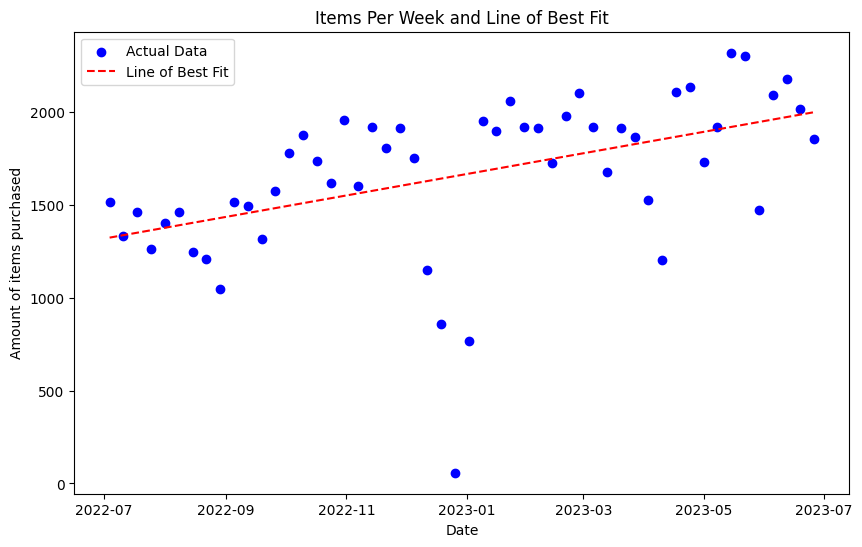

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame
# items_per_week = pd.DataFrame({
#     'Date': pd.date_range(start='2023-01-01', periods=100, freq='W'),
#     'Counts': np.random.poisson(lam=200, size=100)  # Random weekly data
# })
# items_per_week.set_index('Date', inplace=True)

# Ensure items_per_week['Counts'] is a pandas Series with a datetime index
items_counts_series = items_per_week['Counts']

# Prepare the data for linear regression
X = np.arange(len(items_counts_series)).reshape(-1, 1)  # Independent variable (time) as ordinal
y = items_counts_series.values  # Dependent variable (counts)

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(items_per_week['Week_Start_Date'], items_counts_series, label='Actual Data', color='blue')  # Plot actual data
plt.plot(items_per_week['Week_Start_Date'], trendline, label='Line of Best Fit', color='red', linestyle='--')  # Plot line of best fit

plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Amount of items purchased')  # Set y-axis label
plt.title('Items Per Week and Line of Best Fit')  # Set title
plt.legend()  # Show legend

plt.show()  # Display the plot


In [ ]:

items_counts_series = items_per_week['Counts']

# Prepare the data for linear regression
X = np.arange(len(items_counts_series)).reshape(-1, 1)  # Independent variable (time) as ordinal
y = items_counts_series.values  # Dependent variable (counts)

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(items_per_week['Week_Start_Date'], items_counts_series, label='Actual Data', color='blue')  # Plot actual data
plt.plot(items_per_week['Week_Start_Date'], trendline, label='Line of Best Fit', color='red', linestyle='--')  # Plot line of best fit

plt.xlabel('Date')  # Set x-axis label
plt.ylabel('Amount of items purchased')  # Set y-axis label
plt.title('Items Per Week and Line of Best Fit')  # Set title
plt.legend()  # Show legend

plt.show()  # Display the plot


In [ ]:
items_per_week['Counts']

1     1516
2     1330
3     1463
4     1260
5     1401
6     1461
7     1247
8     1208
9     1048
10    1518
11    1495
12    1315
13    1572
14    1781
15    1878
16    1737
17    1615
18    1956
19    1602
20    1919
21    1806
22    1914
23    1750
24    1147
25     857
26      58
27     769
28    1952
29    1895
30    2057
31    1918
32    1914
33    1723
34    1980
35    2101
36    1921
37    1676
38    1916
39    1863
40    1528
41    1205
42    2108
43    2136
44    1730
45    1917
46    2319
47    2300
48    1471
49    2092
50    2176
51    2014
52    1854
Name: Counts, dtype: int64

In [ ]:
forecast_predicted_mean

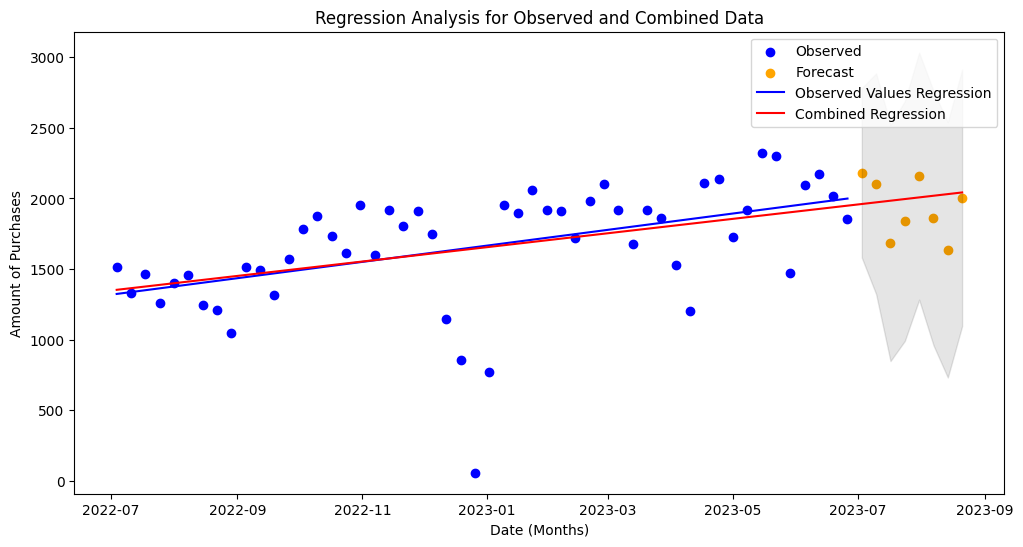

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

plt.figure(figsize=(12, 6))

# Assuming data conversion is already handled
items_per_week['Week_Start_Date'] = pd.to_datetime(items_per_week['Week_Start_Date'])
forecast_predicted_mean.index = pd.to_datetime(forecast_predicted_mean.index)

# Scatter plots for observed and forecasted values
plt.scatter(items_per_week['Week_Start_Date'], items_per_week['Counts'], label='Observed', color='blue')
plt.scatter(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

# Convert dates to numerical format for regression
observed_dates = mdates.date2num(items_per_week['Week_Start_Date'])
predicted_dates = mdates.date2num(forecast_predicted_mean.index)

# Fit and plot linear regression for observed values
z = np.polyfit(observed_dates, items_per_week['Counts'], 1)
p = np.poly1d(z)
plt.plot(items_per_week['Week_Start_Date'], p(observed_dates), "b-", label='Observed Values Regression')

# Fit and plot linear regression for combined observed and forecasted values
all_dates = np.concatenate((observed_dates, predicted_dates))
all_values = np.concatenate((items_per_week['Counts'], forecast_predicted_mean))

z_combined = np.polyfit(all_dates, all_values, 1)
p_combined = np.poly1d(z_combined)
combined_dates = np.concatenate((items_per_week['Week_Start_Date'], forecast_predicted_mean.index))
plt.plot(combined_dates, p_combined(all_dates), "r-", label='Combined Regression')

plt.ylabel('Amount of Purchases')
plt.xlabel('Date (Months)')
plt.title('Regression Analysis for Observed and Combined Data')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

# Formatting date on x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Set to display every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.show()


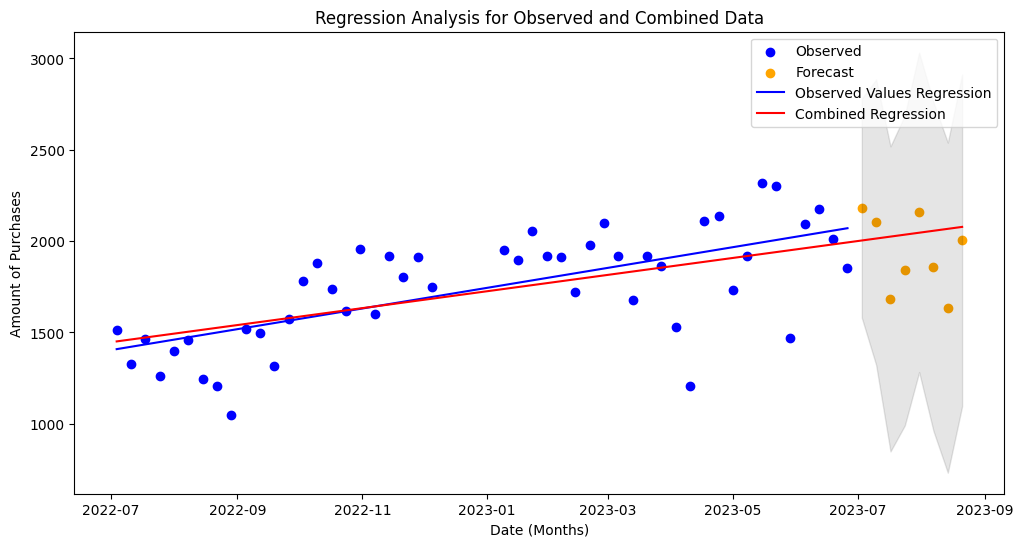

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Convert the date if not already done
items_per_week['Week_Start_Date'] = pd.to_datetime(items_per_week['Week_Start_Date'])
forecast_predicted_mean.index = pd.to_datetime(forecast_predicted_mean.index)

# Exclude specific indices
indices_to_exclude = [24, 25, 26, 27]
filtered_items = items_per_week.drop(indices_to_exclude)

plt.figure(figsize=(12, 6))

# Scatter plots for observed (excluding certain indices) and forecasted values
plt.scatter(filtered_items['Week_Start_Date'], filtered_items['Counts'], label='Observed', color='blue')
plt.scatter(forecast_predicted_mean.index, forecast_predicted_mean, label='Forecast', color='orange')

# Convert dates to numerical format for regression
observed_dates = mdates.date2num(filtered_items['Week_Start_Date'])
predicted_dates = mdates.date2num(forecast_predicted_mean.index)

# Fit and plot linear regression for observed values
z = np.polyfit(observed_dates, filtered_items['Counts'], 1)
p = np.poly1d(z)
plt.plot(filtered_items['Week_Start_Date'], p(observed_dates), "b-", label='Observed Values Regression')

# Fit and plot linear regression for combined observed and forecasted values
all_dates = np.concatenate((observed_dates, predicted_dates))
all_values = np.concatenate((filtered_items['Counts'], forecast_predicted_mean))

z_combined = np.polyfit(all_dates, all_values, 1)
p_combined = np.poly1d(z_combined)
combined_dates = np.concatenate((filtered_items['Week_Start_Date'], forecast_predicted_mean.index))
plt.plot(combined_dates, p_combined(all_dates), "r-", label='Combined Regression')

plt.ylabel('Amount of Purchases')
plt.xlabel('Date (Months)')
plt.title('Regression Analysis for Observed and Combined Data')

# Optionally plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=0.1)

# Formatting date on x-axis for better readability
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

# Assuming your data is already properly loaded and datetime conversion has been handled
items_per_week['Week_Start_Date'] = pd.to_datetime(items_per_week['Week_Start_Date'])
forecast_predicted_mean.index = pd.to_datetime(forecast_predicted_mean.index)

# Dropping specific indices (if needed)
indices_to_exclude = [24, 25, 26, 27]
filtered_items = items_per_week.drop(indices_to_exclude)

# Prepare data for regression (Observed Data)
observed_dates = mdates.date2num(filtered_items['Week_Start_Date'])
X_obs = sm.add_constant(observed_dates)  # adding a constant for the intercept
y_obs = filtered_items['Counts']

# Fit regression model (Observed Data)
model_obs = sm.OLS(y_obs, X_obs)
results_obs = model_obs.fit()

# Prepare data for regression (Combined Data)
combined_dates = np.concatenate((mdates.date2num(filtered_items['Week_Start_Date']), mdates.date2num(forecast_predicted_mean.index)))
combined_values = np.concatenate((filtered_items['Counts'], forecast_predicted_mean))
X_comb = sm.add_constant(combined_dates)  # adding a constant for the intercept
y_comb = combined_values

# Fit regression model (Combined Data)
model_comb = sm.OLS(y_comb, X_comb)
results_comb = model_comb.fit()

z_combined = np.polyfit(combined_dates, combined_counts, 1)
p_combined = np.poly1d(z_combined)

# Print the errors of the gradients using direct indexing
print("Standard Error of the Gradient (Observed):", results_obs.bse[1])
print("Standard Error of the Gradient (Combined):", results_comb.bse[1])

# Optional: You can also output full summaries of the regression results
# print(results_obs.summary())
# print(results_comb.summary())


Standard Error of the Gradient (Observed): 0.3089774889690683
Standard Error of the Gradient (Combined): 0.2532728525308632


C:\Users\Boomw\AppData\Local\Temp\ipykernel_23820\4287668735.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Standard Error of the Gradient (Observed):", results_obs.bse[1])


Gradient of observed data line: 1.8545205613223763
Gradient of combined data line: 1.5179530997935045


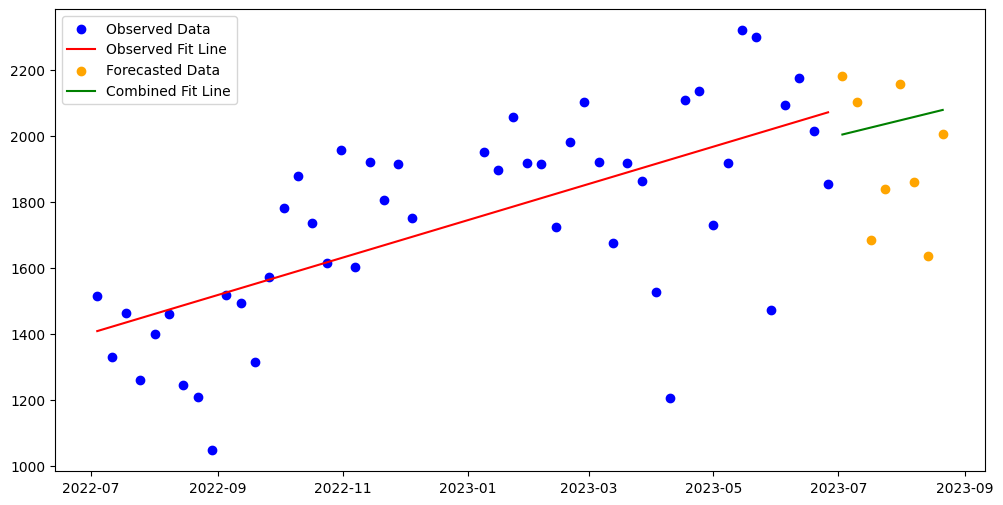

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Sample data loading and preparation
# items_per_week = pd.DataFrame(...)  # Your DataFrame here
# forecast_predicted_mean = pd.Series(...)  # Your Series/DataFrame here

# Converting dates to a format that can be used in numerical calculations
items_per_week['Week_Start_Date'] = pd.to_datetime(items_per_week['Week_Start_Date'])
forecast_predicted_mean.index = pd.to_datetime(forecast_predicted_mean.index)

# Excluding specific indices
indices_to_exclude = [24, 25, 26, 27]
filtered_items = items_per_week.drop(indices_to_exclude)

# Convert dates to ordinal for regression compatibility
filtered_items['Ordinal_Dates'] = filtered_items['Week_Start_Date'].apply(lambda x: x.toordinal())
forecast_dates = forecast_predicted_mean.index.to_series().apply(lambda x: x.toordinal())

# Combine observed and forecasted data for the combined line
combined_dates = np.concatenate((filtered_items['Ordinal_Dates'].values, forecast_dates.values))
combined_counts = np.concatenate((filtered_items['Counts'].values, forecast_predicted_mean.values))

# Regression for observed data
z_observed = np.polyfit(filtered_items['Ordinal_Dates'], filtered_items['Counts'], 1)
p_observed = np.poly1d(z_observed)

# Regression for combined data
z_combined = np.polyfit(combined_dates, combined_counts, 1)
p_combined = np.poly1d(z_combined)

# Printing the gradients
print("Gradient of observed data line:", z_observed[0])
print("Gradient of combined data line:", z_combined[0])

# Optionally, plot the lines and data
plt.figure(figsize=(12, 6))
plt.scatter(filtered_items['Week_Start_Date'], filtered_items['Counts'], color='blue', label='Observed Data')
plt.plot(filtered_items['Week_Start_Date'], p_observed(filtered_items['Ordinal_Dates']), "r-", label='Observed Fit Line')
plt.scatter(forecast_predicted_mean.index, forecast_predicted_mean, color='orange', label='Forecasted Data')
plt.plot(forecast_predicted_mean.index, p_combined(forecast_dates), "g-", label='Combined Fit Line')
plt.legend()
plt.show()


Observed Fit Gradient: 1.8916527423741472, Intercept: -34952.55773194587
Combined Fit Gradient: 1.6692027121132176, Intercept: -30657.429075621232


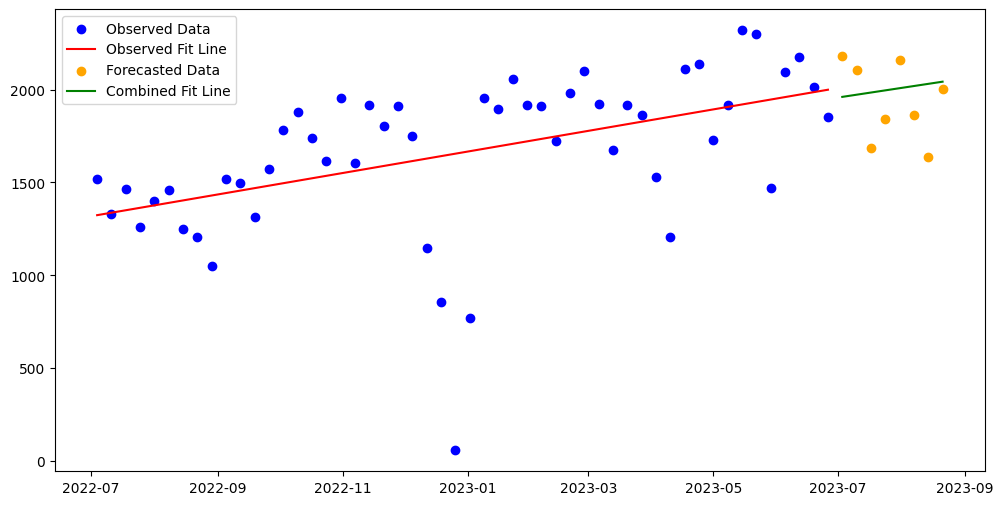

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Example data setup (ensure your data is formatted similarly)
items_per_week['Week_Start_Date'] = pd.to_datetime(items_per_week['Week_Start_Date'])
forecast_predicted_mean.index = pd.to_datetime(forecast_predicted_mean.index)

# Convert dates to ordinal numbers for regression analysis
observed_dates = np.array([mdates.date2num(date) for date in items_per_week['Week_Start_Date']])
forecast_dates = np.array([mdates.date2num(date) for date in forecast_predicted_mean.index])

# Concatenate observed and forecasted data for combined analysis
combined_dates = np.concatenate((observed_dates, forecast_dates))
combined_values = np.concatenate((items_per_week['Counts'], forecast_predicted_mean))

# Perform linear regression on observed data
m_observed, b_observed = np.polyfit(observed_dates, items_per_week['Counts'], 1)

# Perform linear regression on combined data
m_combined, b_combined = np.polyfit(combined_dates, combined_values, 1)

# Print results
print(f"Observed Fit Gradient: {m_observed}, Intercept: {b_observed}")
print(f"Combined Fit Gradient: {m_combined}, Intercept: {b_combined}")

# Plotting for visual verification
plt.figure(figsize=(12, 6))
plt.scatter(items_per_week['Week_Start_Date'], items_per_week['Counts'], color='blue', label='Observed Data')
plt.plot(items_per_week['Week_Start_Date'], m_observed * observed_dates + b_observed, 'r-', label='Observed Fit Line')
plt.scatter(forecast_predicted_mean.index, forecast_predicted_mean, color='orange', label='Forecasted Data')
plt.plot(forecast_predicted_mean.index, m_combined * forecast_dates + b_combined, 'g-', label='Combined Fit Line')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming filtered_items and forecast_predicted_mean are defined and contain the data

# Convert dates to ordinal for regression compatibility
filtered_items['Ordinal_Dates'] = filtered_items['Week_Start_Date'].apply(lambda x: x.toordinal())
forecast_dates = forecast_predicted_mean.index.to_series().apply(lambda x: x.toordinal())

# Combine observed and forecasted data for the combined line
combined_dates = np.concatenate((filtered_items['Ordinal_Dates'].values, forecast_dates.values))
combined_counts = np.concatenate((filtered_items['Counts'].values, forecast_predicted_mean.values))

# Prepare data for regression
X_observed = sm.add_constant(filtered_items['Ordinal_Dates'])  # Adds a constant term to the predictor
y_observed = filtered_items['Counts']

X_combined = sm.add_constant(combined_dates)  # Adds a constant term to the predictor
y_combined = combined_counts

# Perform regression using OLS (Ordinary Least Squares)
model_observed = sm.OLS(y_observed, X_observed).fit()
model_combined = sm.OLS(y_combined, X_combined).fit()

# Print the summary of the models to see the p-values
print(model_observed.summary())
print(model_combined.summary())


                            OLS Regression Results                            
Dep. Variable:                 Counts   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     36.03
Date:                Wed, 01 May 2024   Prob (F-statistic):           2.87e-07
Time:                        01:57:25   Log-Likelihood:                -328.94
No. Observations:                  48   AIC:                             661.9
Df Residuals:                      46   BIC:                             665.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.368e+06   2.28e+05     -5.994